In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PowerTransformer
import seaborn as sns
from scipy.stats import skew, kurtosis

In [55]:
data = pd.read_csv(r"/kaggle/input/air-quality-dataset/air_quality_with_target.csv")

In [56]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target
0,01-03-2004,00:00:00,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970,High
1,01-03-2004,01:00:00,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657,Moderate
2,01-03-2004,02:00:00,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877,Low
3,01-03-2004,03:00:00,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256,Low
4,01-03-2004,04:00:00,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638,Low


In [57]:
data.drop(columns = ["Date","Time","Target"], inplace = True)

In [58]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4,1.3970
1,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3,1.4657
2,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2,0.9877
3,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2,0.8256
4,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9,1.1638


In [59]:
data.shape

(1000, 13)

In [60]:
X = np.array(data)

In [61]:
np.cov(X)

array([[392970.92205069, 351005.70088542, 367770.11049316, ...,
        271635.42207873, 230566.56434949, 322060.21800553],
       [351005.70088542, 353286.6258555 , 355748.56398348, ...,
        242010.74340115, 219604.11717428, 318165.88233523],
       [367770.11049316, 355748.56398348, 377273.71454869, ...,
        263859.40910347, 233161.73563274, 327027.22332102],
       ...,
       [271635.42207873, 242010.74340115, 263859.40910347, ...,
        228666.30809994, 174601.66890435, 213592.14898197],
       [230566.56434949, 219604.11717428, 233161.73563274, ...,
        174601.66890435, 148715.19594984, 200862.58092969],
       [322060.21800553, 318165.88233523, 327027.22332102, ...,
        213592.14898197, 200862.58092969, 314018.68919568]])

In [62]:
cond_index = max(np.linalg.eigvals(np.matmul(X.T,X)))/np.linalg.eigvals(np.matmul(X.T,X))

In [63]:
cond_index

array([1.00000000e+00, 6.68232612e+01, 8.09114147e+01, 1.41736438e+02,
       2.00524530e+02, 6.44816324e+02, 2.40999397e+02, 2.27472870e+02,
       3.22352810e+02, 1.12212953e+04, 6.53612195e+04, 5.91054497e+04,
       4.06155640e+07])

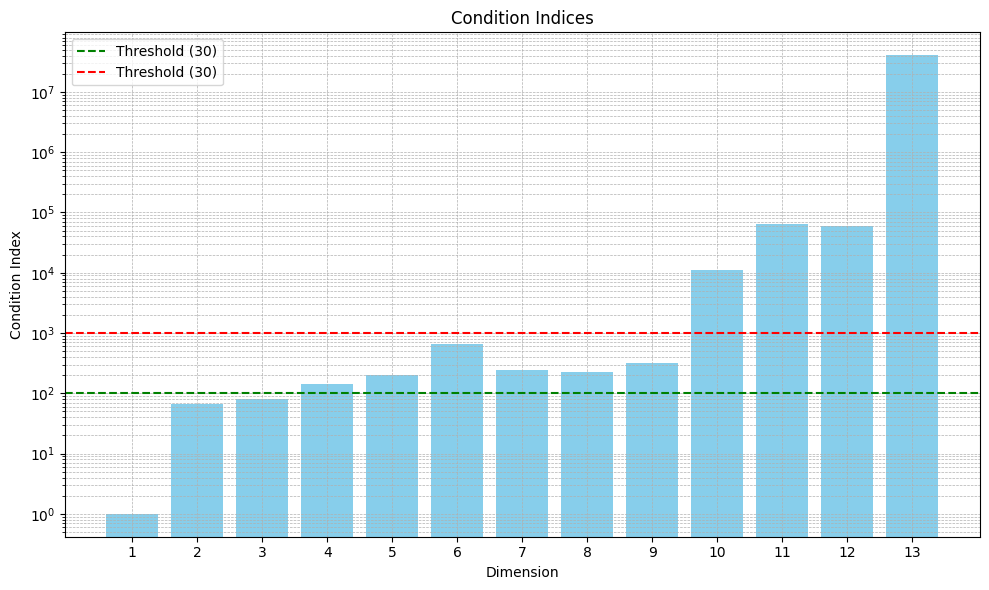

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cond_index) + 1), cond_index, color='skyblue')
plt.axhline(y=100, color='green', linestyle='--', label='Threshold (30)')
plt.axhline(y=1000, color='red', linestyle='--', label='Threshold (30)')
plt.title('Condition Indices')
plt.xlabel('Dimension')
plt.ylabel('Condition Index')
plt.yscale('log')  # Use log scale to handle large range
plt.xticks(range(1, len(cond_index) + 1))
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [65]:
y = data["AH"]
X = data.drop("AH", axis = 1)

In [66]:
var_names = ['(Constant)'] + list(X.columns)

In [67]:
pt = PowerTransformer(method='yeo-johnson')
X_yeo = pt.fit_transform(X)
df_scaled = pd.DataFrame(X_yeo, columns=X.columns)

# 2. Then apply standard scaling to transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_yeo)

In [68]:
df_scaled = X

In [69]:
df_scaled

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,-200.0,1475,120,32.8,1065,-200,502,60,1339,1270,19.9,46.4
1,-200.0,968,-200,13.0,1194,100,635,60,1187,1442,17.6,18.3
2,-200.0,1097,120,9.2,1159,100,809,-200,1334,1388,10.9,59.2
3,0.5,1032,-200,18.4,978,150,948,60,1056,789,3.8,56.2
4,0.5,1070,120,11.1,776,-200,731,60,1300,981,15.5,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.5,1269,120,14.1,851,100,842,-200,1630,1305,5.9,19.2
996,-200.0,876,150,16.3,940,150,919,100,1275,1280,15.5,26.2
997,1.0,1320,120,6.3,652,150,983,100,1019,764,2.9,58.3
998,1.0,823,150,17.0,729,100,687,60,875,892,9.0,70.5


In [70]:
def compute_vif(X):
    if isinstance(X, pd.DataFrame):
        var_names = X.columns
        X_values = X.values
    else:
        var_names = [f"X{i}" for i in range(X.shape[1])]
        X_values = X
    
    vif_data = []
    for i in range(X_values.shape[1]):
        X_other = np.delete(X_values, i, axis=1)
        y = X_values[:, i]
        beta = np.linalg.lstsq(X_other, y, rcond=None)[0]
        y_hat = X_other @ beta
        
        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_2 = 1 - ss_res / ss_tot
        
        vif = 1 / (1 - r_2)
        vif_data.append(vif)
    
    return pd.DataFrame({'Variable': var_names, 'VIF': vif_data})

In [71]:
compute_vif(X)

,Variable,VIF
0,CO(GT),1.008945
1,PT08.S1(CO),0.735974
2,NMHC(GT),1.003236
3,C6H6(GT),0.986487
4,PT08.S2(NMHC),0.755972
5,NOx(GT),1.013837
6,PT08.S3(NOx),0.920500
7,NO2(GT),1.006266
8,PT08.S4(NO2),0.927648
9,PT08.S5(O3),0.914299


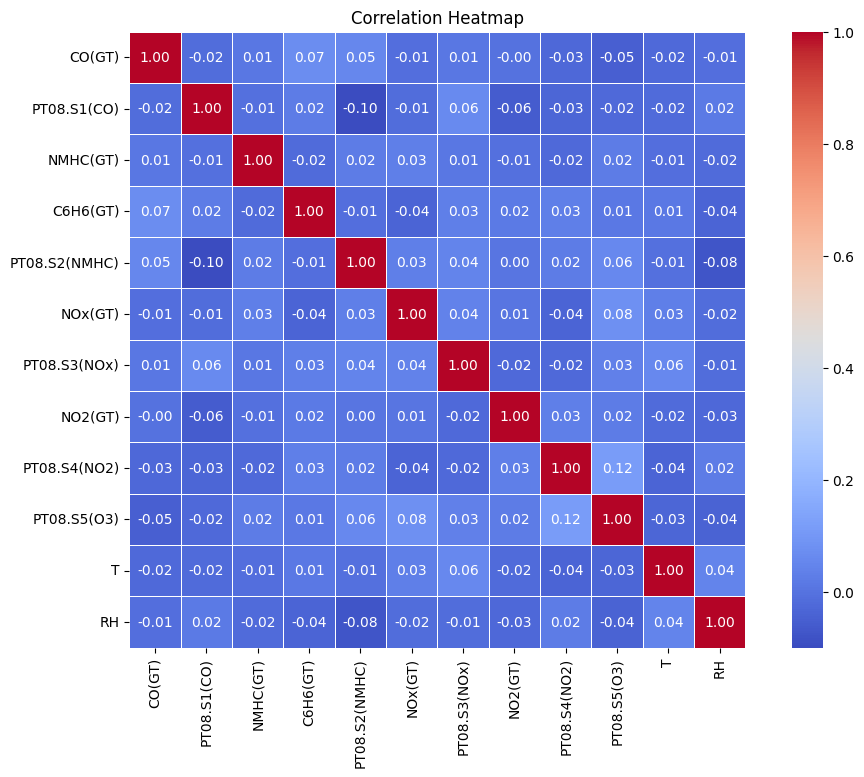

In [72]:
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [73]:
X = np.array(X)

In [74]:
X.shape

(1000, 12)

In [75]:
X = np.column_stack([np.ones(X.shape[0]), X])

In [76]:
X.shape

(1000, 13)

In [77]:
X

array([[ 1.000e+00, -2.000e+02,  1.475e+03, ...,  1.270e+03,  1.990e+01,
         4.640e+01],
       [ 1.000e+00, -2.000e+02,  9.680e+02, ...,  1.442e+03,  1.760e+01,
         1.830e+01],
       [ 1.000e+00, -2.000e+02,  1.097e+03, ...,  1.388e+03,  1.090e+01,
         5.920e+01],
       ...,
       [ 1.000e+00,  1.000e+00,  1.320e+03, ...,  7.640e+02,  2.900e+00,
         5.830e+01],
       [ 1.000e+00,  1.000e+00,  8.230e+02, ...,  8.920e+02,  9.000e+00,
         7.050e+01],
       [ 1.000e+00, -2.000e+02,  8.140e+02, ...,  1.652e+03,  1.630e+01,
         2.070e+01]])

In [78]:
XtX = X.T @ X

In [79]:
np.linalg.eigvals(XtX)

array([5.66511184e+09, 8.47775393e+07, 7.00162209e+07, 3.99693383e+07,
       2.82514643e+07, 2.49045595e+07, 2.35067457e+07, 1.75742584e+07,
       8.78562060e+06, 5.04854045e+05, 8.60380980e+00, 9.58478150e+04,
       8.66738884e+04])

In [80]:
ci = np.sqrt(max(np.linalg.eigvals(XtX))/np.linalg.eigvals(XtX))

In [81]:
ci

array([1.00000000e+00, 8.17454974e+00, 8.99507753e+00, 1.19053115e+01,
       1.41606687e+01, 1.50822040e+01, 1.55241557e+01, 1.79541868e+01,
       2.53932344e+01, 1.05930574e+02, 2.56601295e+04, 2.43115773e+02,
       2.55658422e+02])

In [82]:
max(ci)

25660.12947893744

In [83]:
min(ci)

1.0

In [84]:
k = max(ci)/min(ci)

In [85]:
k

25660.12947893744

In [86]:
vals, vecs = np.linalg.eig(XtX)

In [87]:
vecs

array([[-4.17515516e-04,  9.53761365e-05, -1.05575898e-04,
        -1.54208381e-04,  2.28193111e-05,  2.23193971e-05,
        -1.48666857e-05,  1.54189209e-05, -6.16855394e-05,
         1.21552464e-03, -9.99996329e-01,  2.37094940e-03,
         1.41126128e-04],
       [ 2.70552309e-02, -1.98168998e-03, -6.23130519e-03,
        -2.85050064e-02,  1.66636629e-02, -3.11849999e-04,
        -1.10544748e-02, -6.98130988e-04,  9.98958818e-01,
         6.14831546e-03, -6.39732917e-05, -2.08038038e-03,
         7.16968891e-03],
       [-5.11450649e-01,  3.62579192e-01, -6.23247259e-01,
         4.43446808e-01,  1.29474588e-01, -3.99802738e-02,
         3.85531815e-02,  3.55158101e-02,  2.16963895e-02,
        -1.61408204e-02,  2.13772319e-04, -5.48180636e-03,
         1.08581165e-03],
       [-1.12630201e-02,  2.52886195e-02,  1.48833592e-02,
        -5.11228037e-02,  2.56507013e-02, -8.40576148e-01,
        -5.36951324e-01,  2.81226983e-02, -7.63176410e-03,
         2.26027272e-03,  9.42379456e

In [88]:
U = np.linalg.inv(vecs)
E = np.diag(np.linalg.inv(XtX))
V = U.T

In [89]:
U.shape

(13, 13)

In [90]:
np.diag(E).shape

(13, 13)

In [91]:
V.shape

(13, 13)

In [92]:
phi = U @ np.diag(E) @ V

In [93]:
phi.shape

(13, 13)

In [94]:
phi

array([[ 4.13952672e-08, -9.05388446e-09,  9.17978944e-09,
         1.52790174e-08,  2.03811559e-11, -1.75192050e-09,
         8.99474393e-10, -6.36134300e-10,  5.80310827e-09,
        -1.10049642e-07,  4.85259239e-05, -2.36146180e-07,
        -5.25729861e-09],
       [-9.05388446e-09,  1.38725874e-08, -3.30593909e-09,
        -3.74644538e-09, -1.29676493e-09, -9.20625397e-10,
         5.26147006e-10, -8.56338191e-10, -8.66614149e-10,
         2.02112611e-08, -1.10851327e-05,  5.56218341e-08,
         1.28434847e-08],
       [ 9.17978944e-09, -3.30593909e-09,  1.74155547e-08,
         2.25331229e-09,  1.04448685e-09, -1.76188940e-09,
         1.59488892e-09,  1.23927302e-09,  1.03809799e-10,
        -3.54733322e-08,  1.22705793e-05, -6.61206050e-08,
        -4.91017658e-09],
       [ 1.52790174e-08, -3.74644538e-09,  2.25331229e-09,
         3.24966571e-08, -9.13915515e-10,  1.84949573e-10,
         3.05360998e-11, -6.06997146e-10, -1.43345589e-09,
        -2.90221117e-08,  1.79229231e

In [95]:
var_props = np.abs((phi.T / phi.sum(axis=1)).T)

In [96]:
var_props

array([[8.58189016e-04, 1.87701269e-04, 1.90311478e-04, 3.16758069e-04,
        4.22533429e-07, 3.63200682e-05, 1.86475193e-05, 1.31880649e-05,
        1.20307565e-04, 2.28150222e-03, 1.00601875e+00, 4.89568184e-03,
        1.08992072e-04],
       [8.22923007e-04, 1.26090314e-03, 3.00482444e-04, 3.40520813e-04,
        1.17865177e-04, 8.36772131e-05, 4.78223991e-05, 7.78340393e-05,
        7.87680386e-05, 1.83703601e-03, 1.00754662e+00, 5.05556340e-03,
        1.16736623e-03],
       [7.52945463e-04, 2.71160014e-04, 1.42846010e-03, 1.84821371e-04,
        8.56709882e-05, 1.44513840e-04, 1.30816113e-04, 1.01647756e-04,
        8.51469610e-06, 2.90959665e-03, 1.00645849e+00, 5.42334984e-03,
        4.02742917e-04],
       [8.57583788e-04, 2.10281246e-04, 1.26474369e-04, 1.82397896e-03,
        5.12964354e-05, 1.03808871e-05, 1.71393641e-06, 3.40696589e-05,
        8.04573027e-05, 1.62895897e-03, 1.00598146e+00, 5.38371381e-03,
        1.41281494e-03],
       [7.66042214e-06, 4.87399577e-

In [115]:
vals

array([5.66511184e+09, 8.47775393e+07, 7.00162209e+07, 3.99693383e+07,
       2.82514643e+07, 2.49045595e+07, 2.35067457e+07, 1.75742584e+07,
       8.78562060e+06, 5.04854045e+05, 8.60380980e+00, 9.58478150e+04,
       8.66738884e+04])

In [110]:
df = pd.DataFrame({
    'Dimension': np.arange(1, len(vals)+1),
    'Eigenvalue': vals.real,
    'Condition Index': ci.real
})

In [111]:
var_names = np.array(var_names)

In [112]:
for i, name in enumerate(var_names):
    print(name,i)
    df[name] = var_props[:, i]

(Constant) 0
CO(GT) 1
PT08.S1(CO) 2
NMHC(GT) 3
C6H6(GT) 4
PT08.S2(NMHC) 5
NOx(GT) 6
PT08.S3(NOx) 7
NO2(GT) 8
PT08.S4(NO2) 9
PT08.S5(O3) 10
T 11
RH 12


In [113]:
print(df)

    Dimension    Eigenvalue  Condition Index  (Constant)    CO(GT)  \
0           1  5.665112e+09         1.000000    0.000858  0.000188   
1           2  8.477754e+07         8.174550    0.000823  0.001261   
2           3  7.001622e+07         8.995078    0.000753  0.000271   
3           4  3.996934e+07        11.905312    0.000858  0.000210   
4           5  2.825146e+07        14.160669    0.000008  0.000487   
5           6  2.490456e+07        15.082204    0.000691  0.000363   
6           7  2.350675e+07        15.524156    0.000504  0.000295   
7           8  1.757426e+07        17.954187    0.000364  0.000490   
8           9  8.785621e+06        25.393234    0.000807  0.000121   
9          10  5.048540e+05       105.930574    0.000797  0.000146   
10         11  8.603810e+00     25660.129479    0.000419  0.000096   
11         12  9.584781e+04       243.115773    0.000897  0.000211   
12         13  8.667389e+04       255.658422    0.001086  0.002653   

    PT08.S1(CO)  NM

In [114]:
df

,Dimension,Eigenvalue,Condition Index,(Constant),CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,1,5.665112e+09,1.000000,0.000858,0.000188,0.000190,0.000317,4.225334e-07,0.000036,0.000019,0.000013,0.000120,0.002282,1.006019,0.004896,0.000109
1,2,8.477754e+07,8.174550,0.000823,0.001261,0.000300,0.000341,1.178652e-04,0.000084,0.000048,0.000078,0.000079,0.001837,1.007547,0.005056,0.001167
2,3,7.001622e+07,8.995078,0.000753,0.000271,0.001428,0.000185,8.567099e-05,0.000145,0.000131,0.000102,0.000009,0.002910,1.006458,0.005423,0.000403
3,4,3.996934e+07,11.905312,0.000858,0.000210,0.000126,0.001824,5.129644e-05,0.000010,0.000002,0.000034,0.000080,0.001629,1.005981,0.005384,0.001413
4,5,2.825146e+07,14.160669,0.000008,0.000487,0.000393,0.000344,1.272167e-02,0.000111,0.000316,0.000180,0.000451,0.001330,0.996886,0.010074,0.004427
5,6,2.490456e+07,15.082204,0.000691,0.000363,0.000694,0.000073,1.169038e-04,0.016188,0.000141,0.000119,0.000015,0.004220,1.022500,0.010802,0.007116
6,7,2.350675e+07,15.524156,0.000504,0.000295,0.000894,0.000017,4.718795e-04,0.000200,0.023215,0.000248,0.000480,0.001968,0.968740,0.003588,0.012794
7,8,1.757426e+07,17.954187,0.000364,0.000490,0.000709,0.000347,2.736409e-04,0.000173,0.000253,0.032517,0.000033,0.003197,1.024761,0.007141,0.011941
8,9,8.785621e+06,25.393234,0.000807,0.000121,0.000014,0.000199,1.668382e-04,0.000005,0.000119,0.000008,0.016103,0.003009,0.997107,0.000840,0.011593
9,10,5.048540e+05,105.930574,0.000797,0.000146,0.000257,0.000210,2.562734e-05,0.000078,0.000025,0.000040,0.000157,0.016975,1.022995,0.004994,0.002315
